In [4]:
# Volcano DESeq2 RNAseq Kis / TRR

In [5]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaplotlib
from seaplotlib import plot as p

class DataReader(object):
    
    @staticmethod
    def read_normalized_table(path):
        df = pd.read_csv(path, sep='\t', index_col=0)
        df.index = [x.split('_')[1] for x in df.index]
        return df

    @staticmethod
    def read_deseq2_table(path):
        columns = ['Base mean', 'log2(FC)', 'StdErr', 'Wald-Stats', 'P-value', 'P-adj']
        df = pd.read_csv(path, sep='\t', header=None, index_col=0).dropna()
        df.columns = columns
        df.index = [x.split('_')[-1] for x in df.index]
        return df
    
    @staticmethod
    def order_by_mean(df, columns=12):
        mean_df = df.loc[:, df.columns[columns:]]
        mean_df = mean_df.reindex(mean_df.mean(axis=1).sort_values(ascending=False).index)
        return mean_df
    
THEME='white'
seaplotlib.helper.set_style(THEME)

In [6]:
kismet = DataReader.read_deseq2_table('differentially_expressed_genes/kis.tabular')
trr = DataReader.read_deseq2_table('differentially_expressed_genes/trr.tabular')

In [7]:
kismet_diff_exp = list(kismet[kismet['P-adj'] < 0.01].index)
trr_diff_exp = list(trr[trr['P-adj'] < 0.01].index)

In [8]:
kismet['outlier'] = 'No outlier'
trr['outlier'] = 'No outlier'

In [9]:
kismet.loc[kismet['P-adj'] < 10**-30, ['P-adj', 'outlier']] = (10**-30, 'Outlier')
trr.loc[trr['P-adj'] < 10**-30, ['P-adj', 'outlier']] = (10**-30, 'Outlier')

kismet.loc[(kismet['log2(FC)']) > 3, ['log2(FC)', 'outlier']] = (3, 'Right Outlier')
trr.loc[(trr['log2(FC)']) > 3, ['log2(FC)', 'outlier']] = (3, 'Right Outlier')
kismet.loc[(kismet['log2(FC)']) < -3, ['log2(FC)', 'outlier']] = (3, 'Right Outlier')
trr.loc[(trr['log2(FC)']) < -3, ['log2(FC)', 'outlier']] = (3, 'Right Outlier')

In [10]:
kismet.outlier.unique()

array(['Right Outlier', 'Outlier', 'No outlier'], dtype=object)

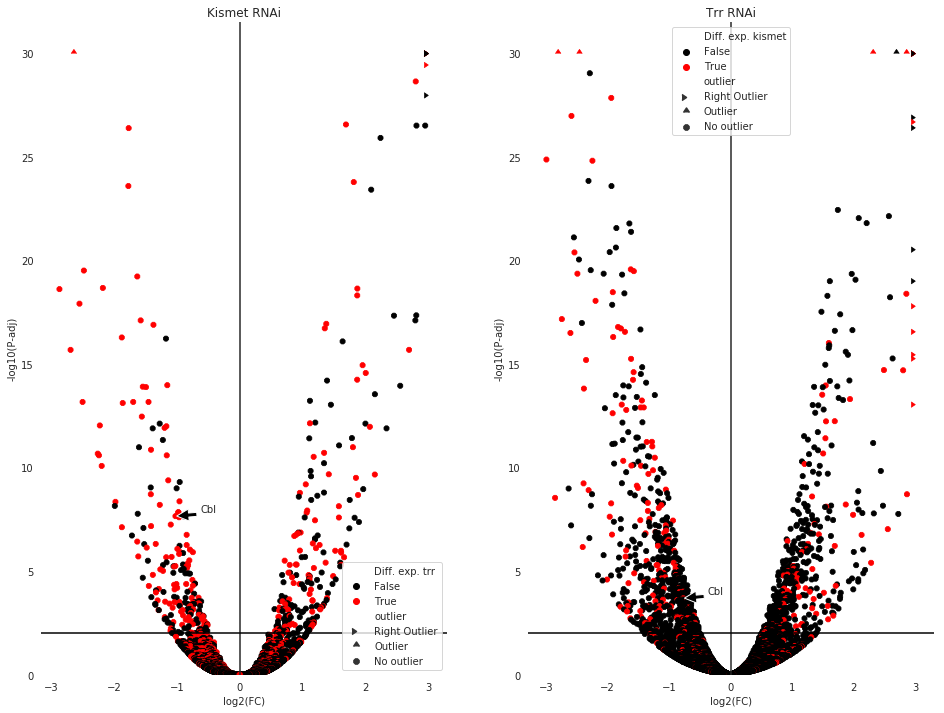

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 12))
colors = ["black", "red"]
sns.set_palette(colors)

markers = {"Outlier": 10, "No outlier": "8", "Right Outlier": 5, "Left Outlier": 8}
scatter_kwargs = {'edgecolor': None, 'alpha': 1, 's': 30, 'legend': 'full', 'style': 'outlier', 'markers': markers}
highlight_label = 'Diff. exp. trr'

p.volcano_deseq2(kismet, ax=axes[0], highlight_in=trr_diff_exp, label_in={'FBgn0020224': 'Cbl'}, scatter_kwargs=scatter_kwargs, highlight_label=highlight_label).set_title('Kismet RNAi')
axes[0].axhline(2, alpha=1, color='k')
highlight_label = 'Diff. exp. kismet'
p.volcano_deseq2(trr, ax=axes[1], highlight_in=kismet_diff_exp, label_in={'FBgn0020224': 'Cbl'}, scatter_kwargs=scatter_kwargs, highlight_label=highlight_label).set_title('Trr RNAi')
axes[1].axhline(2, alpha=1, color='k')
fig.savefig('Kismet-Trr-volcano-diff-kismet.pdf')